In [1]:
from utils import *
from fastai2.vision.widgets import *

In [2]:
key =  "251fba944da544f0879d186e6815d82d"

In [14]:
#doc(search_images_bing)

In [4]:
ims = search_images_bing(key, "maple leaf").attrgot("content_url")
len(ims)

150

In [7]:
leaf_types = "maple", "oak", "birch"
path = Path("leaves")

In [10]:
if not path.exists():
    path.mkdir()
for o in leaf_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} leaf')
    download_images(dest, urls=results.attrgot('content_url'))


 Download of https://averageus.files.wordpress.com/2012/12/average-us-header_maple-leaves.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p leaves/maple
$ cd leaves/maple
$ wget -c https://averageus.files.wordpress.com/2012/12/average-us-header_maple-leaves.png
$ tar xf average-us-header_maple-leaves.png
 And re-run your code once the download is successful



In [11]:
fns = get_image_files(path)
fns

(#449) [Path('leaves/maple/00000007.JPG'),Path('leaves/maple/00000000.jpg'),Path('leaves/maple/00000002.jpg'),Path('leaves/maple/00000005.jpg'),Path('leaves/maple/00000003.jpeg'),Path('leaves/maple/00000006.jpg'),Path('leaves/maple/00000010.jpg'),Path('leaves/maple/00000001.jpg'),Path('leaves/maple/00000004.jpg'),Path('leaves/maple/00000012.jpg')...]

In [12]:
failed = verify_images(fns)
failed

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


(#5) [Path('leaves/maple/00000030.png'),Path('leaves/maple/00000063.jpg'),Path('leaves/maple/00000109.jpg'),Path('leaves/oak/00000062.jpg'),Path('leaves/oak/00000123.jpg')]

In [13]:
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [22]:
leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(vlid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = leaves.dataloaders(path)

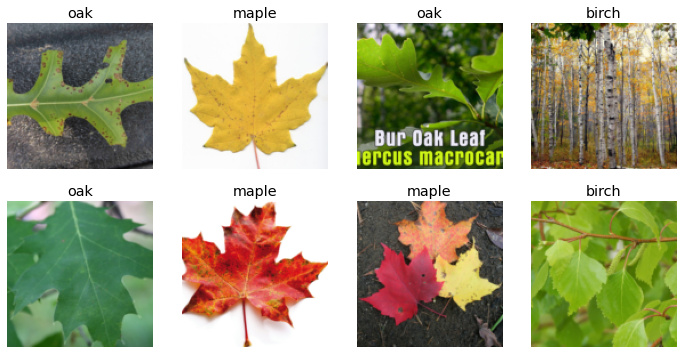

In [23]:
dls.valid.show_batch(max_n=8, nrows=2)

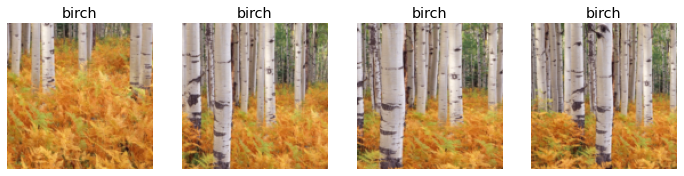

In [26]:
leaves.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
).dataloaders(path).train.show_batch(
    max_n=4, nrows=1, unique=True
)

In [27]:
leaves = leaves.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
           batch_tfms=aug_transforms()
          )
dls = leaves.dataloaders(path)

In [30]:
learner = cnn_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.837268,0.584606,0.227273,00:15


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.810242,0.393733,0.136364,00:15
1,0.655310,0.298712,0.102273,00:14
2,0.547065,0.265764,0.113636,00:15
3,0.438546,0.263509,0.102273,00:15


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/I

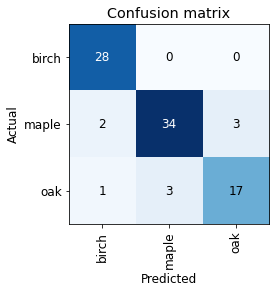

In [31]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

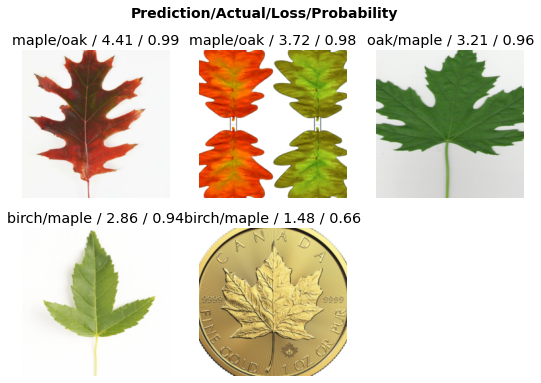

In [33]:
interp.plot_top_losses(5, nrows=2)

In [35]:
cleaner = ImageClassifierCleaner(learner)
cleaner

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [37]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [38]:
leaves = leaves.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
           batch_tfms=aug_transforms()
          )
dls = leaves.dataloaders(path)

In [39]:
learner = cnn_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.581690,0.609976,0.181818,00:14


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.753889,0.352413,0.125000,00:14
1,0.568630,0.292387,0.090909,00:15
2,0.482226,0.303168,0.102273,00:16
3,0.428511,0.310917,0.102273,00:15


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/I

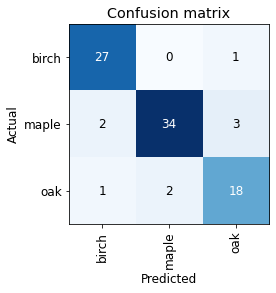

In [40]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

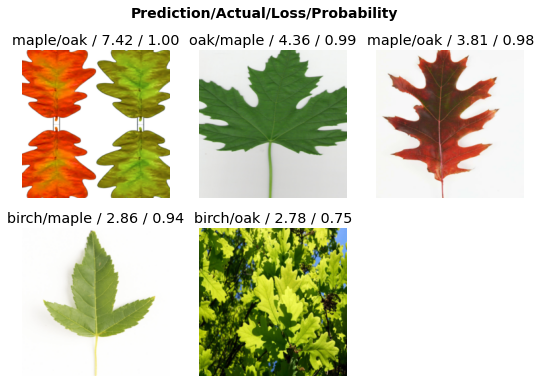

In [41]:
interp.plot_top_losses(5, nrows=2)

In [43]:
learner.export(fname="leaves.pkl")

In [48]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('leaves.pkl')]

In [49]:
learner_inf = load_learner(path/'leaves.pkl')

In [50]:
learner_inf.dls.vocab

(#3) ['birch','maple','oak']

In [55]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [54]:
# btn_upload = SimpleNamespace(data = ['images/oak.jpeg'])

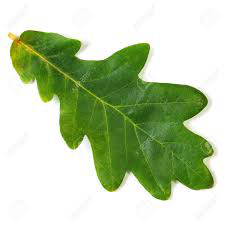

In [57]:
img = PILImage.create(btn_upload.data[-1])
img

In [60]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [63]:
pred, pred_idx, probs = learner_inf.predict(img)

In [64]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: oak; Probability: 0.9997')

In [65]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [77]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    
    pred,pred_idx,probs = learner_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [76]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your leaf!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

AttributeError: 'Button' object has no attribute 'data'

NameError: name 'learn_inf' is not defined